## Section 1: Business Understanding

This project explores the private company landscape in the U.S. Suppose, you want to start a business and have no idea. What sectors would you like to focus on? What industries provide good growth opportunities? This notebook explores some of these important questions

### Question 1: How many private companies are there per idustry and what is their average revenue?

### Question 2: What industries and states provide high growth opportunities? 

### Question 3: What does industry spread out look like in top 10 states? 

The goal of this exercise is to provide a high level view to allow you identify sectors and states that can provide good basis to start thinking about what your next business idea is and where would you like to start it?

Import relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


Load data from the CSV

In [2]:
df = pd.read_csv("INC 5000 Companies 2019.csv")

## Section 2: Data Understanding

We explore some basic properties like how many rows and columns do we have. Are there any nulls? If yes, how many and why? What does the data type look like. 

In [3]:
## Shape
print("-- Shape (Rows x Columns) --")
print(df.shape)

-- Shape (Rows x Columns) --
(5012, 14)


In [4]:
print("-- Count Nulls --")
print(np.sum(df.isnull()))

percent_missing_metro = (np.sum(df.metro.isnull())/df.shape[0]*100).round(2)
print("Metro columns has "+str(percent_missing_metro)+"% missing values.")

-- Count Nulls --
rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               1
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64
Metro columns has 16.22% missing values.


Since metro column has 16.2% of values missing, we would focus on state level to identify any geographic trends. This can provide as a proxy for what states offer feasible conditions to grow faster. We will do some data preparation regarding states in the next section.

In [5]:
print("-- Data Types--")
print(df.dtypes)

-- Data Types--
rank                  int64
profile              object
name                 object
url                  object
state                object
revenue              object
growth_%            float64
industry             object
workers             float64
previous_workers      int64
founded               int64
yrs_on_list           int64
metro                object
city                 object
dtype: object


We notice that revenue is an object and would like to see what kind of information do we have here. 

In [6]:
df['revenue'].sort_values()

2602        1 Billion
3690        1 Billion
4377        1 Billion
2730      1.1 Billion
4979      1.1 Billion
            ...      
4527     99.3 Million
1944     99.4 Million
899      99.6 Million
1339     99.7 Million
3268    990.6 Million
Name: revenue, Length: 5012, dtype: object

We notice that we have string like objects here. Additionally, we also note that the units are different. For the purpose of our analysis we would need to convert all into single units. We will be converting all values to millions in the next section. 

## Section 3: Data Preparation

In this section, we will perfrom so transformations to prepare data for analysis.

1) We will transform the revenue column so we have floats and revenue in single units (i.e.,$ Millions)

2) We will map out state names for easier interpretation

3) Calculate worker growth 

In [7]:
# 1 - Transform revenues


def check_units(unit,num):
    '''
    This function takes a string and a number to check the units and returns everything in millions. 
    Inputs: 
        unit: Str - could be in Million or Billion
        num: Float - the value
    Output:
        Num: converts a number to million if the units are billion, million otherwise
    '''
    if unit == "Million":
        return num
    if unit == "Billion":
        return num*1000

    
# Split revenue column and breakdown into value and units
df['revenue_value']= df['revenue'].apply(lambda x: x.split(' ',1)[0]).astype(float)
df['revenue_units'] = df['revenue'].apply(lambda x: x.split(' ',1)[1]).astype(str)

# Convert revenue values to millions     
df['revenue_value']=df.apply(lambda x: check_units(x['revenue_units'],x['revenue_value']),axis=1)

In [8]:
# 2 - Map state names

states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

df['state_name']=df.state.apply(lambda x: states[x])

In [9]:
#3 - Worker growth rate
df['worker_growth']=(df['workers']/df['previous_workers'] -1) *100

## Section 4: Visualize and evaluate results

In this section, we visualize and evaluate results to see if we can identify any trends


### Question 1: How many private companies are there per idustry and what is their average revenue?

We break this down into two parts:

1) We plot a bar chart for number of companies per industry 

2) We plot a bar chart for average revenue per industry

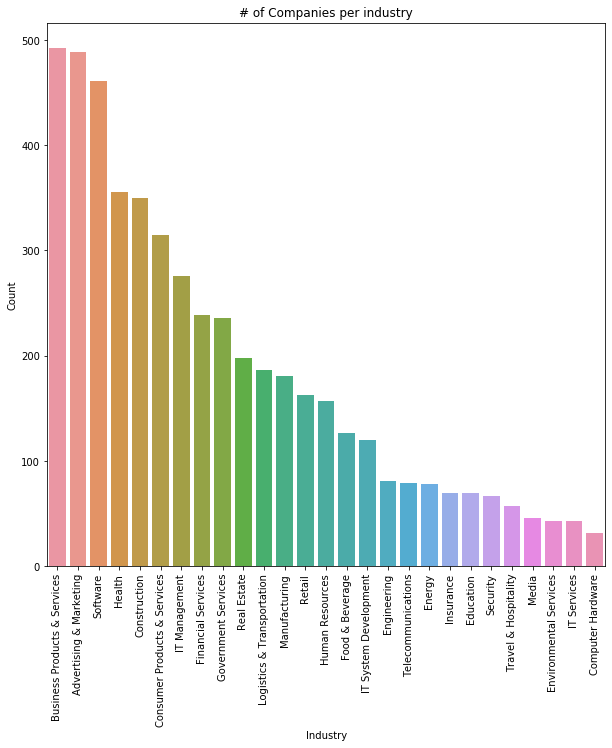

In [10]:
# 1- Industry Count

industry_count = (df.industry.value_counts()).to_frame().reset_index().rename(columns={'index':'Industry','industry':'Count'})


f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Industry',y='Count',data=industry_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("# of Companies per industry");

$Conclusion:$ Industries with characterized with low barriers to enter and usually in the services sector have a high number of players. Industries such computer hardware, IT Services, Environmental Services and Media which require high initial investment and very specialized knowledge are low in numbers. 

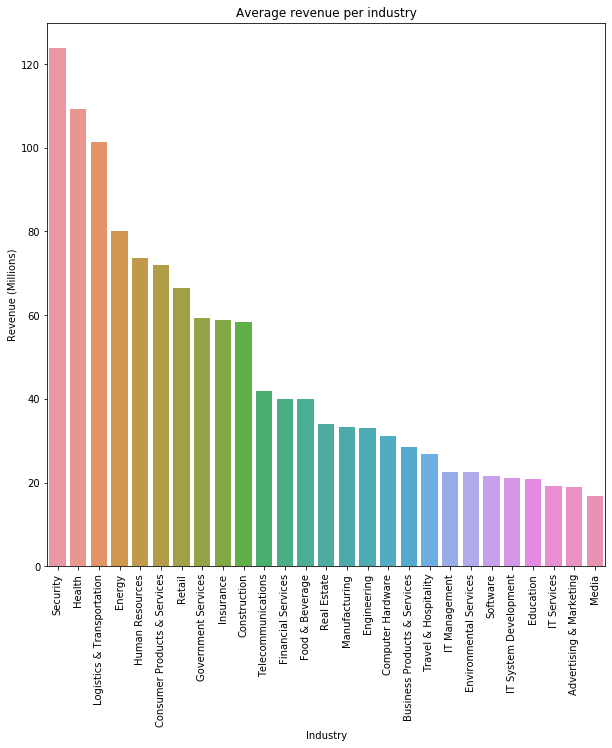

In [11]:
# 2 - Average revenue per industry 

# Calculate average revenue by industry and round it to two decimal places
revenue_data = df.groupby(by='industry')['revenue_value'].mean().round(2).to_frame().reset_index().rename(columns={'industry':'Industry','revenue_value':'Revenue'})


revenue_data = revenue_data.sort_values(by='Revenue',ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Industry',y='Revenue',data=revenue_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average revenue per industry")
ax.set_ylabel("Revenue (Millions)");

$Conclusion:$ We notice that sectors like Security, Health and Logistics have significantly higher revenues. Characteristics like fewer players, nature of sales (in dollar amount and how recurring it is) and changing consumer needs explain the higher average incomes. Industries, like Advertising & Marketing, in the lower-income bracket, have a more significant rivalry, a higher number of substitutes available and homogenous services/products.

### Question 2: What industries and states provide high growth opportunities? 


In this section we explore growth rate by industries and states. We will look at box plots for growth rates to explore the range of growth rates per industry/state and what the dispersion looks like. 

Again, we break it down into two plots:

1) Growth rate per industry 

2) Growth rate per state



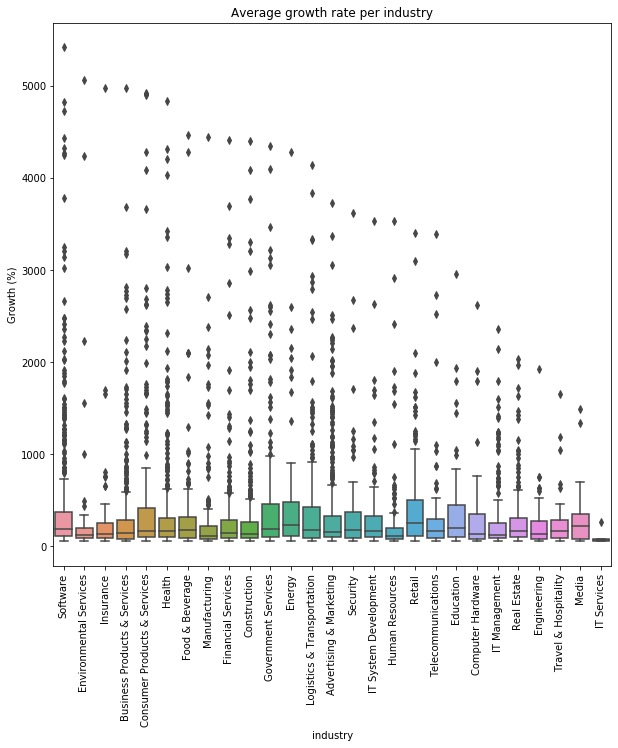

In [14]:
# 1 - Growth rate per industry

# Remove Extreme values from the growth rate column. - trim 1% from each end. 
q_low = df["growth_%"].quantile(0.01)
q_hi  = df["growth_%"].quantile(0.99)

df_filtered = df[(df["growth_%"] < q_hi) & (df["growth_%"] > q_low)]

# Sort by values
df_filtered.sort_values(by='growth_%',ascending=False)


# Slice growth and industry columns
revenue_data = df[['industry','growth_%']].rename(columns={'industry':'Industry','revenue_value':'Revenue'})

revenue_data = revenue_data.sort_values(by='growth_%',ascending=False)

# Plot data
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='industry',y='growth_%',data=df_filtered)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per industry")
ax.set_ylabel("Growth (%)");

$Conclusion:$ It seems that Consumer Products & Services, Energy and Retail had higher range of growth rates. We also notice a higher dispersion for these sectors. It could be due to changing market environments and number of players. 


Next we will look at growth rate per states. 

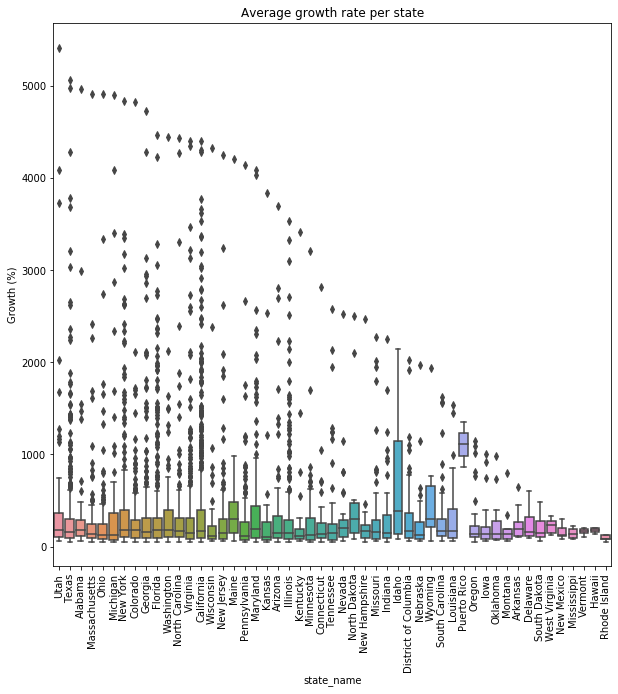

In [15]:
# 2 - Growth rate per state

f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='state_name',y='growth_%',data=df_filtered)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per state")
ax.set_ylabel("Growth (%)");

$Conclusion:$ Nothing concrete can be concluded from these charts. However, Idaho looks interesting. Lets take a deeper look at the chart for Idaho and what kind of sectors are there

Software                        4
Logistics & Transportation      2
Retail                          2
Business Products & Services    2
Telecommunications              2
Construction                    2
Real Estate                     1
Advertising & Marketing         1
Consumer Products & Services    1
Media                           1
Education                       1
Human Resources                 1
Health                          1
Name: industry, dtype: int64

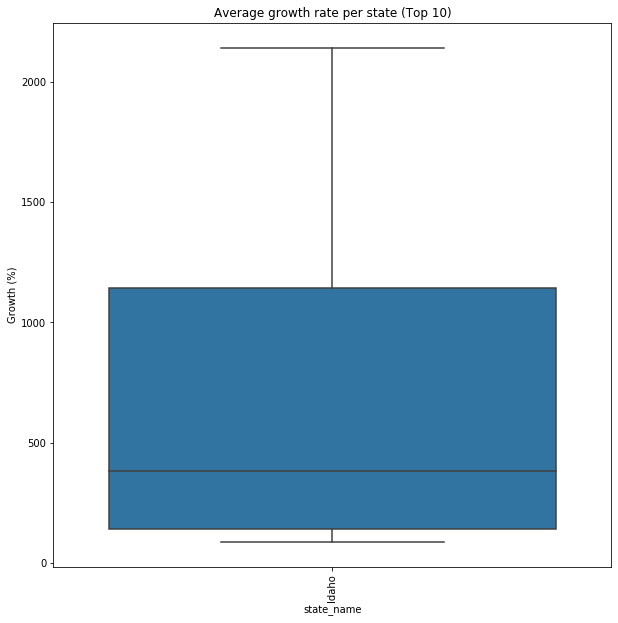

In [16]:
# Adhoc - For Idaho
# Filter out data for idaho
df_idaho = df_filtered[df_filtered['state_name']=="Idaho"]

# Plot data
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='state_name',y='growth_%',data=df_idaho)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Average growth rate per state (Top 10)")
ax.set_ylabel("Growth (%)");

df[df['state_name']=='Idaho']['industry'].value_counts()

It looks like there are fewer businesses in Idaho which make the box plot look strectched. The business in Idaho are as follows.

In [17]:
df_idaho[['name','revenue','growth_%','industry','founded']].reset_index(drop=True)

,name,revenue,growth_%,industry,founded
0,Velox Media,3.1 Million,2142.0754,Advertising & Marketing,2007
1,Maverick Media Ventures,3.1 Million,1692.6046,Consumer Products & Services,2014
2,Dollar Fulfillment,9.1 Million,1507.9687,Logistics & Transportation,2008
3,EETech Media,6.6 Million,1493.1967,Media,2015
4,NanaMacs Clothing,12 Million,1252.8198,Retail,2012
5,ClickFunnels,94.6 Million,1034.8425,Software,2014
6,Zennify,9 Million,698.2601,Business Products & Services,2013
7,Stukent,3.4 Million,569.5870,Education,2013
8,FyberCom,3.1 Million,522.5213,Telecommunications,2012
9,Lone Cone,14.4 Million,382.0109,Retail,2013


I got curious to see if there is any type of correlation between worker growth rate and revenue growth rate. For this purpose, I decided to do a scatter plot for worker growth rate (x-axis) and revenue growth rate (y-axis). 

It does not look like there is any strong correlation between the two. 

You can see the charts below:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

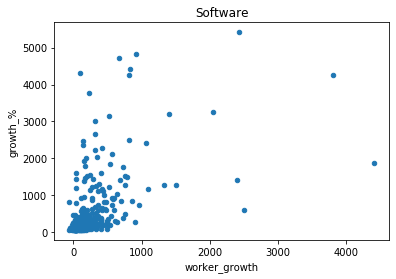

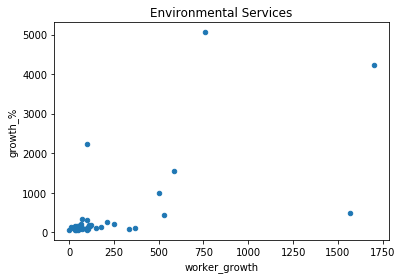

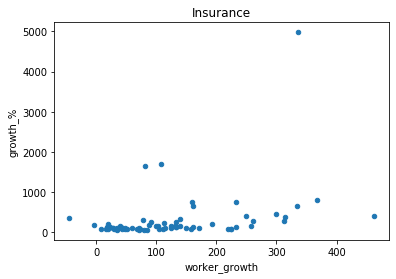

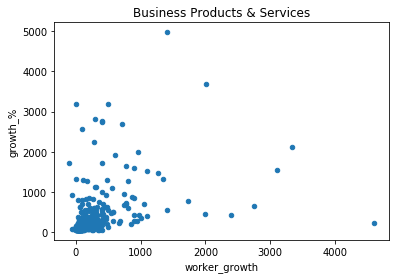

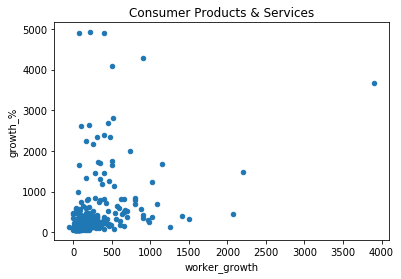

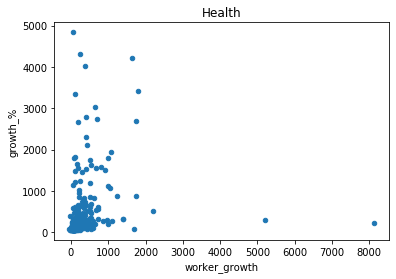

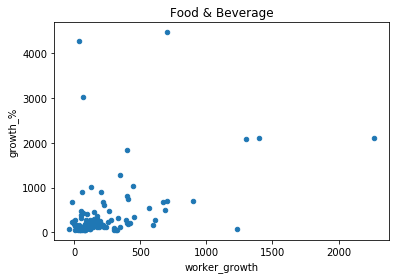

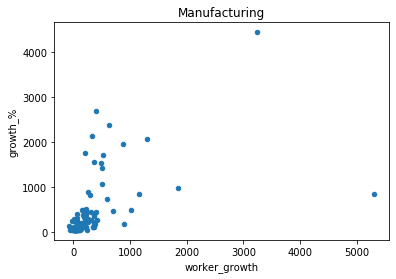

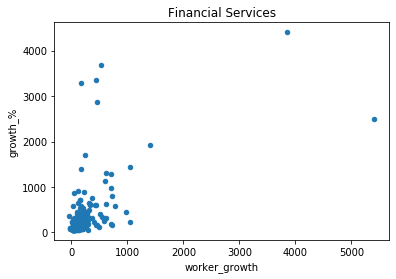

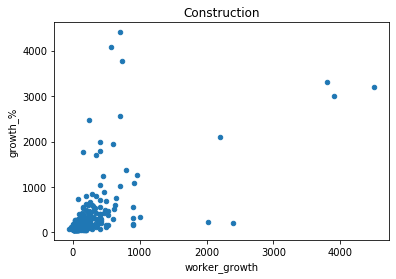

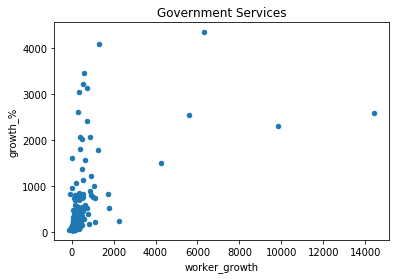

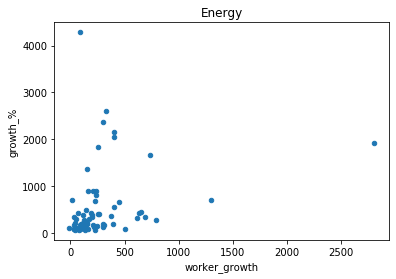

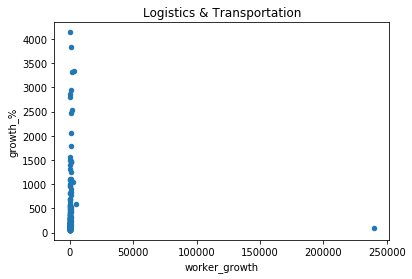

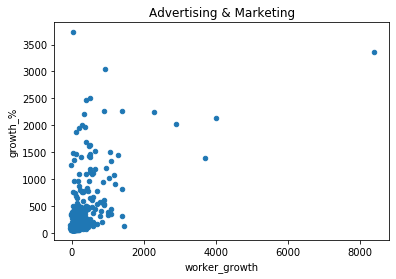

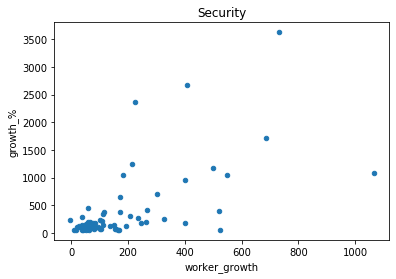

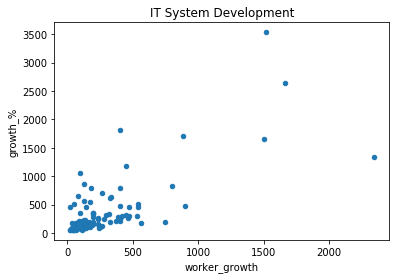

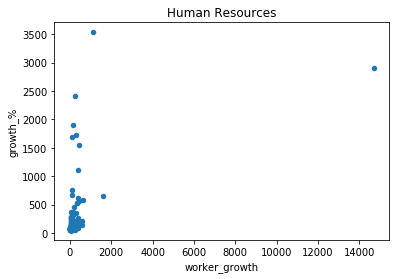

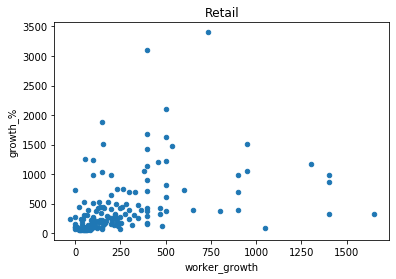

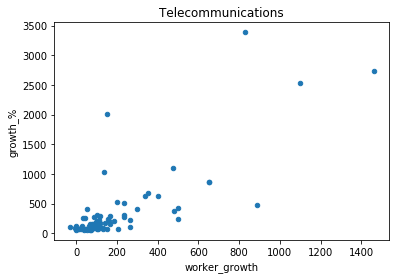

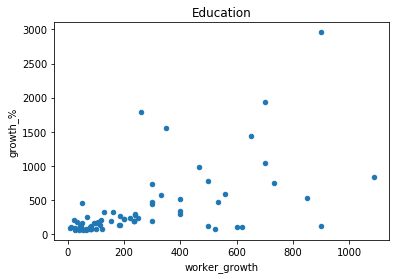

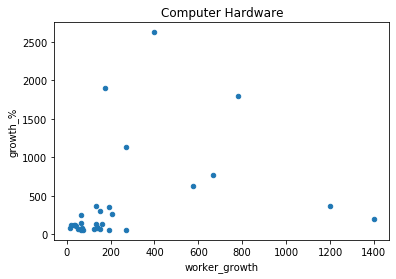

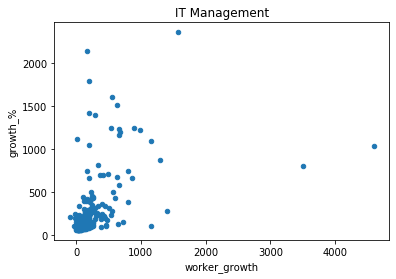

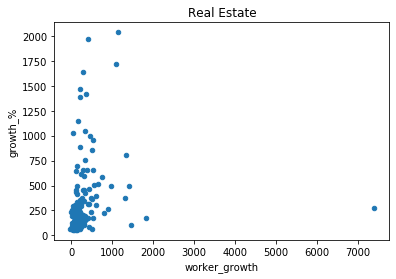

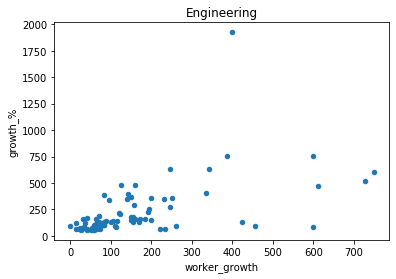

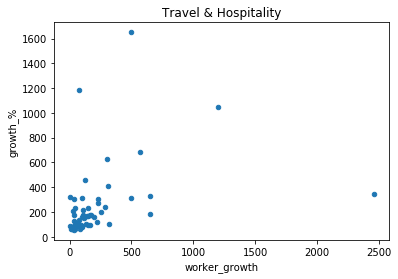

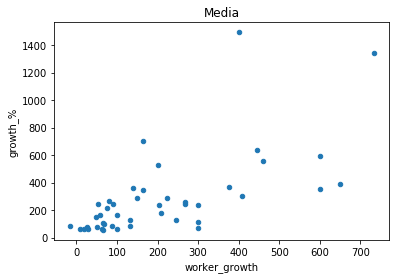

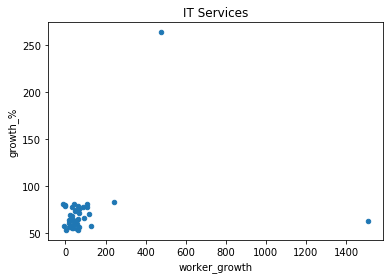

In [18]:
fig = plt.figure()
num = 1

for i in df_filtered.industry.unique():
    dfplot = df_filtered[df_filtered['industry']==i]
    num+=1
    dfplot.plot.scatter(x="worker_growth",y="growth_%",title = i, legend = False)

plt.show();

### Question 3: What does industry spread out look like in top 10 states? 

In this step we look at the industry spread across the top 10 states. 

First, we identify the top 10 states. Next, we plot a horizontal bar chart which shows proportion of each industry in each state

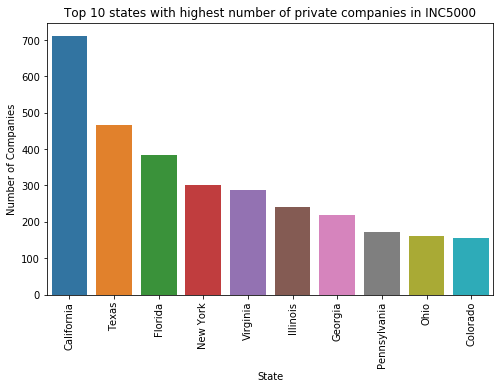

In [19]:
# 1- Identify top 10 states

top10_states = df.state_name.value_counts()[:10].to_frame().reset_index().rename(columns={'index':'State','state_name':'Number of Companies'})

f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='State',y='Number of Companies', data=top10_states)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Top 10 states with highest number of private companies in INC5000");


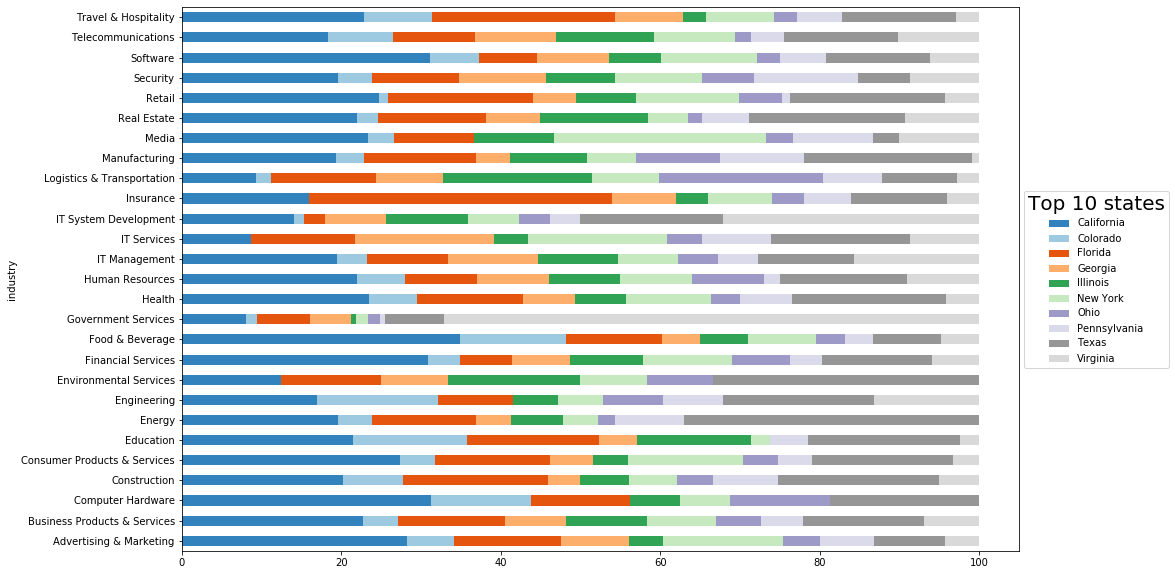

In [20]:

# Filter out top 10 states
list_states = top10_states.State.to_list()
df_states = df_filtered[df_filtered['state_name'].isin(list_states)]

# Get count by state and industry
df_states_industry = df_states.groupby(by=['state_name','industry'])['rank'].count().to_frame().reset_index().rename(columns={'rank':'count'})


df_states_industry = pd.merge(df_states_industry, 
        df_states_industry.groupby(by=['industry'])['count'].sum(),
        how='left',
        on='industry',suffixes=("","_total"))

# Calculate % in each state
df_states_industry['percent'] = df_states_industry['count']/df_states_industry['count_total'] * 100

# Data for stacked plot
df_stacked_plot = df_states_industry.pivot(index='industry',columns='state_name',values='percent')

# Plot stacked plot
ax = df_stacked_plot.plot(kind='barh',stacked=True,colormap='tab20c',figsize=(15,10))

ax.legend(title = "Top 10 states",title_fontsize=20,loc='center left',bbox_to_anchor=(1,0.5))

plt.show()

$Conclusion:$ Almost all states have a high proportion of businesses in Advertising and Marketing, with New York being the most dominant. However, it seems that some states are favourable to other sectors, suggesting some form of state-industry bias.


For instance, Virginia has a high proportion of businesses operating in Government services. Closer proximity to Washington D.C. makes it feasible for firms in this sector to access their customer base and provide services in a timely fashion. Thus, if you want to start a business providing services to the government, Virginia will be the best place to go.


Another notable example is Ohio. Surprisingly, a high proportion of insurance companies are in Ohio. To me, New York would have been the first choice. Higher premiums, access to talent, and legislation make it favourable for insurance businesses in Ohio.



## Section 5: Conclusion

The data suggests that if I were to start a business in the Government Services, Virginia would be the best place. However, suppose I am focusing on Advertising & Marketing. In that case, I can start my business from anywhere and grow rapidly (hopefully?).

While some industries like Consumer Products & Services, Energy and Retail offer excellent growth potential. It would be crucial to have a successful business execution strategy to guarantee rapid growth.

I also posted this on Medium and you can find the relevant article here: https://medium.com/@soom6820/fastest-growing-5000-private-companies-in-the-u-s-in-2019-f452e06a7fcb